# Evolution of Players in the NBA
##### Jason Luo

In [1]:
# Importing necessary packages
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Import Datasets
nba_dataset = pd.read_csv("all_seasons.csv")
salaries = pd.read_csv("NBASalaryData03-17.csv")

In [3]:
# Column Names
pd.unique(nba_dataset.columns)

array(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country',
       'draft_year', 'draft_round', 'draft_number', 'gp', 'pts', 'reb',
       'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct',
       'ast_pct', 'season'], dtype=object)

In [4]:
# Data Dimensions
nba_dataset.shape

(12305, 22)

### Cleaning Data

In [5]:
# Removing the "Unnamed" column
nba_dataset.drop(columns = "Unnamed: 0", inplace = True)

#Looking for missing data in each row
nba_dataset[nba_dataset.isna().any(axis = 1)].head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
41,Dino Radja,BOS,30.0,210.82,102.058200,NaN,USA,1989,2,40,...,14.0,8.4,1.9,-3.3,0.058,0.217,0.227,0.471,0.092,1996-97
78,Jermaine O'Neal,POR,18.0,210.82,102.511792,NaN,USA,1996,1,17,...,4.1,2.8,0.2,1.3,0.099,0.198,0.199,0.494,0.030,1996-97
92,Gheorghe Muresan,WAS,26.0,231.14,137.438376,NaN,USA,1993,2,30,...,10.6,6.6,0.4,6.9,0.098,0.217,0.185,0.618,0.024,1996-97
134,Arvydas Sabonis,POR,32.0,220.98,132.448864,NaN,Lithuania,1986,1,24,...,13.4,7.9,2.1,8.1,0.082,0.282,0.240,0.592,0.136,1996-97
145,Aleksandar Djordjevic,POR,29.0,187.96,89.811216,NaN,USA,Undrafted,Undrafted,Undrafted,...,3.1,0.6,0.6,4.8,0.021,0.070,0.179,0.687,0.135,1996-97


In [6]:
for col in nba_dataset.columns:
    print(col + " "  + str(nba_dataset[col].isna().sum()))
# The only NAs in the NBA dataset are related to "College." Perhaps this is becuase they are international players.

player_name 0
team_abbreviation 0
age 0
player_height 0
player_weight 0
college 1789
country 0
draft_year 0
draft_round 0
draft_number 0
gp 0
pts 0
reb 0
ast 0
net_rating 0
oreb_pct 0
dreb_pct 0
usg_pct 0
ts_pct 0
ast_pct 0
season 0


In [7]:
nba_dataset.loc[(nba_dataset["college"].isna()) & (nba_dataset["country"] != "USA")].head()
len(nba_dataset.loc[(nba_dataset["college"].isna()) & (nba_dataset["country"] != "USA")])
# There are 1203 players in this dataset that are international + didn't go to college

1203

In [8]:
nba_dataset.loc[(nba_dataset["college"].isna()) & (nba_dataset["country"] == "USA")].head()
len(nba_dataset.loc[(nba_dataset["college"].isna()) & (nba_dataset["country"] == "USA")])
# There are 586 players in this dataset that didn't go to college and are from the US

586

In [9]:
# One thing I noticed was that Tony Snell and Enes Kanter were listed as both having and not having went to college. This is an error
nba_dataset.loc[nba_dataset["player_name"] == "Tony Snell", "college"] = "New Mexico"
nba_dataset.loc[nba_dataset["player_name"] == "Enes Kanter", "college"] = "Kentucky"
nba_dataset[nba_dataset["player_name"].isin(["Enes Kanter" ,"Tony Snell"])].head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
6826,Enes Kanter,UTA,20.0,210.82,121.109064,Kentucky,Turkey,2011,1,3,...,4.6,4.2,0.1,-8.2,0.135,0.231,0.169,0.539,0.016,2011-12
7398,Enes Kanter,UTA,21.0,210.82,121.109064,Kentucky,Turkey,2011,1,3,...,7.2,4.3,0.4,3.7,0.147,0.176,0.211,0.588,0.050,2012-13
7759,Tony Snell,CHI,22.0,200.66,90.718400,New Mexico,USA,2013,1,20,...,4.5,1.6,0.9,-4.2,0.018,0.095,0.151,0.489,0.095,2013-14
8023,Enes Kanter,UTA,22.0,210.82,112.037224,Kentucky,Turkey,2011,1,3,...,12.3,7.5,0.9,-12.8,0.116,0.219,0.232,0.523,0.064,2013-14
8222,Enes Kanter,OKC,23.0,210.82,111.130040,Kentucky,Turkey,2011,1,3,...,15.5,8.9,0.7,-2.6,0.147,0.210,0.241,0.564,0.044,2014-15


In [10]:
# Fixing inconsistency of college names in this data set:
# Change NAs in college to "None"
nba_dataset.loc[nba_dataset["college"].isna(), "college"] = "None"

In [11]:
# List of distinct colleges
collegeNames = pd.unique(nba_dataset["college"]) 
len(collegeNames)

346

In [12]:
# Distinct colleges that players went to
for i in range(0, len(collegeNames)):
    if "State" in collegeNames[i]:
        print("College name: " + collegeNames[i])

College name: Southeastern Oklahoma State
College name: Delaware State
College name: Michigan State
College name: Mississippi State
College name: Arizona State
College name: Iowa State
College name: Ohio State
College name: Oregon State
College name: Florida State
College name: Penn State
College name: Oklahoma State
College name: Tennessee State
College name: Wichita State
College name: Cal State-Fullerton
College name: Washington State
College name: Fayetteville State
College name: North Carolina State
College name: Long Beach State
College name: Albany State (GA)
College name: Boise State
College name: Weber State
College name: Louisiana State
College name: New Mexico State
College name: Wright State
College name: Central State (OH)
College name: Coppin State
College name: Jackson State
College name: Murray State
College name: McNeese State
College name: Kansas State
College name: San Diego State
College name: Cal State-Bakersfield
College name: Central Connecticut State
College nam

In [13]:
# Cleaning up college names
# Some colleges are abbreviated both with "State" and "St." Change to make them all "St."
nba_dataset["college"].replace("State", "St.", regex = True, inplace = True)

# Similarily, some of the California colleges are abbreviated both as "Cal" and "California." Change to make them all "Cal"
nba_dataset["college"].replace("California", "Cal", regex = True, inplace = True)

# Finally, I noticed St. John's NY was repeated twice but entered in two different ways. Change to make it consistent
nba_dataset["college"].replace("St. John's, N.Y.", "St. John's (NY)", regex = True, inplace = True)
collegeNames = pd.unique(nba_dataset["college"]) 
len(collegeNames)

342

In [14]:
len(nba_dataset[nba_dataset.duplicated()])
# No duplicate rows

0

## What types of players played in the league?


Weights of Players

# From the years 1996-2022, NBA players on average about 100.36992618155222 kilograms, or 221.27754665837364 pounds


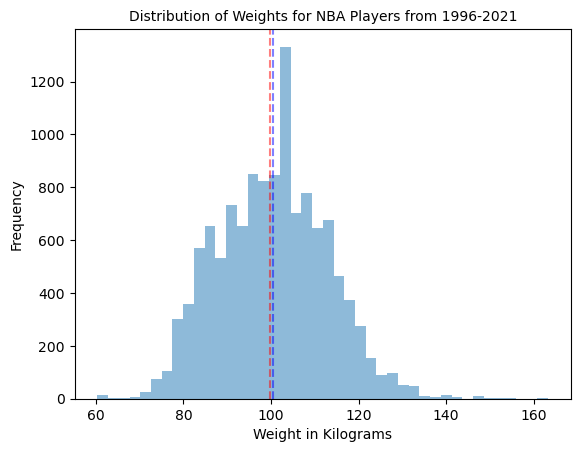

In [15]:
plt.hist(nba_dataset["player_weight"],
         alpha = 0.5, edgecolor = None, 
         bins = 42)
plt.axvline(nba_dataset["player_weight"].mean(), linestyle = "dashed", color = "blue", alpha = 0.5)
plt.axvline(nba_dataset["player_weight"].median(), linestyle = "dashed", color = "red", alpha = 0.5)
plt.xlabel("Weight in Kilograms", size = 10)
plt.xticks(fontsize = 10)
plt.ylabel("Frequency", size = 10)
plt.yticks(fontsize = 10)
plt.title("Distribution of Weights for NBA Players from 1996-2021", size = 10)
plt.grid(False)

print(f"# From the years 1996-2022, NBA players on average about {nba_dataset.player_weight.mean()} kilograms, or {nba_dataset.player_weight.mean() * 2.20462} pounds")

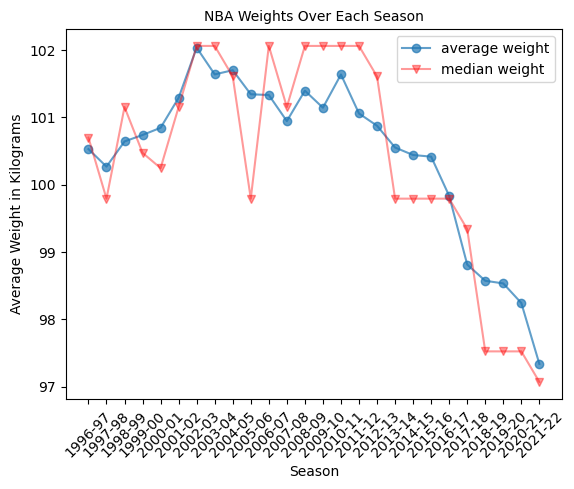

In [16]:
avg_weights_per_season = nba_dataset.groupby("season")["player_weight"].mean().reset_index(name = "avg_weight")
med_weights_per_season = nba_dataset.groupby("season")["player_weight"].median().reset_index(name = "med_weight")

plt.plot(avg_weights_per_season["season"], avg_weights_per_season["avg_weight"], alpha = 0.7, marker = "o")
plt.plot(med_weights_per_season["season"], med_weights_per_season["med_weight"], color = "red", alpha = 0.4, marker = "v")
plt.legend(["average weight", "median weight"], loc = "upper right")
plt.xlabel("Season")
plt.xticks(fontsize = 10, rotation = 45)
plt.ylabel("Average Weight in Kilograms")
plt.yticks(fontsize = 10)
plt.title("NBA Weights Over Each Season", size = 10)
plt.grid(False)

Heights of Players

# From 1996-2022, NBA players on average about 200.61160178789112 centimeters tall, or 6.581745676097848 feet tall


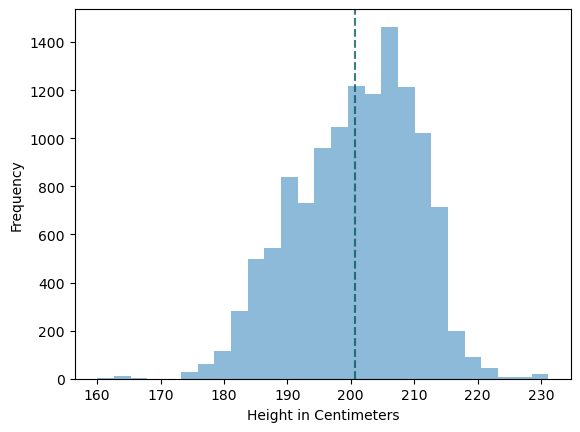

In [17]:
plt.hist(nba_dataset["player_height"],
         alpha = 0.5, edgecolor = None, 
         bins = 27)
plt.axvline(nba_dataset["player_height"].mean(), linestyle = "dashed", color = "blue", alpha = 0.5)
plt.axvline(nba_dataset["player_height"].median(), linestyle = "dashed", color = "green", alpha = 0.5)
plt.xlabel("Height in Centimeters")
plt.ylabel("Frequency")
plt.grid(False)
print(f"# From 1996-2022, NBA players on average about {nba_dataset.player_height.mean()} centimeters tall, or {nba_dataset.player_height.mean() * 0.0328084} feet tall")

Text(0.5, 1.0, 'NBA Heights Over Each Season')

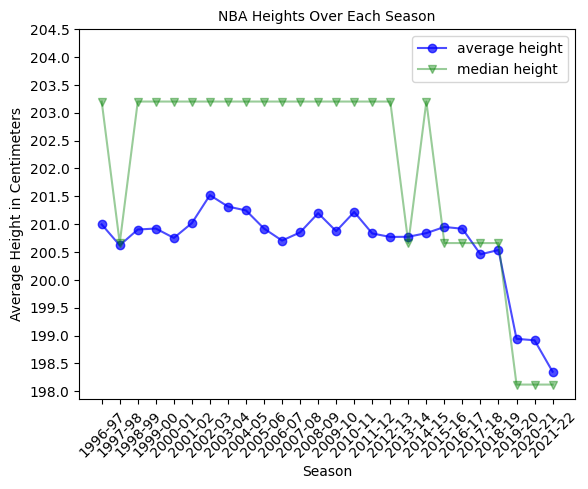

In [18]:
# Analyzing how heights changed over time
avg_heights_per_season = nba_dataset.groupby("season")["player_height"].mean().reset_index(name = "avg_height")
med_heights_per_season = nba_dataset.groupby("season")["player_height"].median().reset_index(name = "med_height")

plt.plot(avg_heights_per_season["season"], avg_heights_per_season["avg_height"], color = "blue", alpha = 0.7, marker = "o")
plt.plot(med_heights_per_season["season"], med_heights_per_season["med_height"], color = "green", alpha = 0.4, marker = "v")
plt.legend(["average height", "median height"], loc = "upper right")
plt.xlabel("Season")
plt.xticks(fontsize = 10, rotation = 45)
plt.ylabel("Average Height in Centimeters")
plt.yticks(np.arange(198, 205, 0.5))
plt.yticks(fontsize = 10)
plt.grid(False)
plt.title("NBA Heights Over Each Season", size = 10)

Tallest and Shortest NBA player

In [19]:
nba_dataset[nba_dataset["player_height"] == nba_dataset["player_height"].max()]
print(f"From 1996-2022, the tallest NBA player, Gheorghe Muresan, was {nba_dataset.player_height.max()} centimeters tall, or {nba_dataset.player_height.max() * 0.0328084} feet tall.")

From 1996-2022, the tallest NBA player, Gheorghe Muresan, was 231.14 centimeters tall, or 7.583333576 feet tall.


In [20]:
nba_dataset[nba_dataset["player_height"] == nba_dataset["player_height"].min()]
print(f"From 1996-2022, the shortest NBA player, Muggsy Bogues, was {nba_dataset.player_height.min()} centimeters tall, or {nba_dataset.player_height.min() * 0.0328084} feet tall.")

From 1996-2022, the shortest NBA player, Muggsy Bogues, was 160.02 centimeters tall, or 5.250000168000001 feet tall.


In [21]:
# correlation between height and weight

### What schools did NBA players go to?

In [22]:
college_count = nba_dataset.groupby("college")["player_name"].nunique().reset_index(name = "players").sort_values(by = "players", ascending = False)
college_count = college_count.loc[college_count["college"] != "None"]
college_count_t20 = college_count.head(20)
college_count_t20

,college,players
121,Kentucky,74
72,Duke,61
293,UCLA,51
118,Kansas,50
188,North Carolina,50
8,Arizona,48
157,Michigan,37
267,Syracuse,35
94,Georgia Tech,34
158,Michigan St.,32


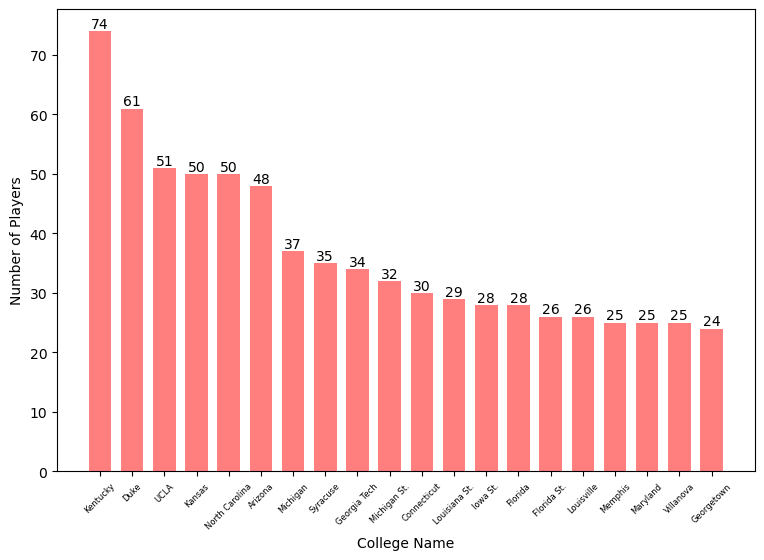

In [23]:
fig, ax = plt.subplots(figsize=[9, 6])

plt.bar(college_count_t20["college"], college_count_t20["players"], width = 0.7, color = "red", alpha = 0.5)
plt.grid(alpha = 0.32)
plt.xlabel("College Name")
plt.xticks(size = 6, rotation = 45)
plt.ylabel("Number of Players")
plt.grid(False)

for container in ax.containers:
    ax.bar_label(container)

Unsuprisingly, Kentucky, Duke, UCLA, UNC, and Kansas have sent the most of their players to the NBA

### How have player stats evolved in the league?

In [24]:
# Statistics of the average NBA player
nba_dataset[["pts", "gp", "ast", "reb"]].mean()

pts     8.172775
gp     51.290532
ast     1.813986
reb     3.559155
dtype: float64

In [25]:
# Average league statistics
avg_league_stats = nba_dataset.groupby("season")[["pts", "ast", "reb", "gp", "net_rating", "oreb_pct", "dreb_pct", "usg_pct", "ts_pct", "ast_pct"]].mean().reset_index()
med_league_stats = nba_dataset.groupby("season")[["pts", "ast", "reb", "gp", "net_rating", "oreb_pct", "dreb_pct", "usg_pct", "ts_pct", "ast_pct"]].median().reset_index()

In [26]:
# Putting statistics into a list
stats = []
for col in avg_league_stats:
    if col == "season":
        continue
    else:
        stats.append(col)
stats

['pts',
 'ast',
 'reb',
 'gp',
 'net_rating',
 'oreb_pct',
 'dreb_pct',
 'usg_pct',
 'ts_pct',
 'ast_pct']

/var/folders/nc/2fhlmlb174j1xg908_jm3bsw0000gn/T/ipykernel_70299/453930780.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i][j].set_xticklabels(avg_league_stats["season"], rotation = 45)


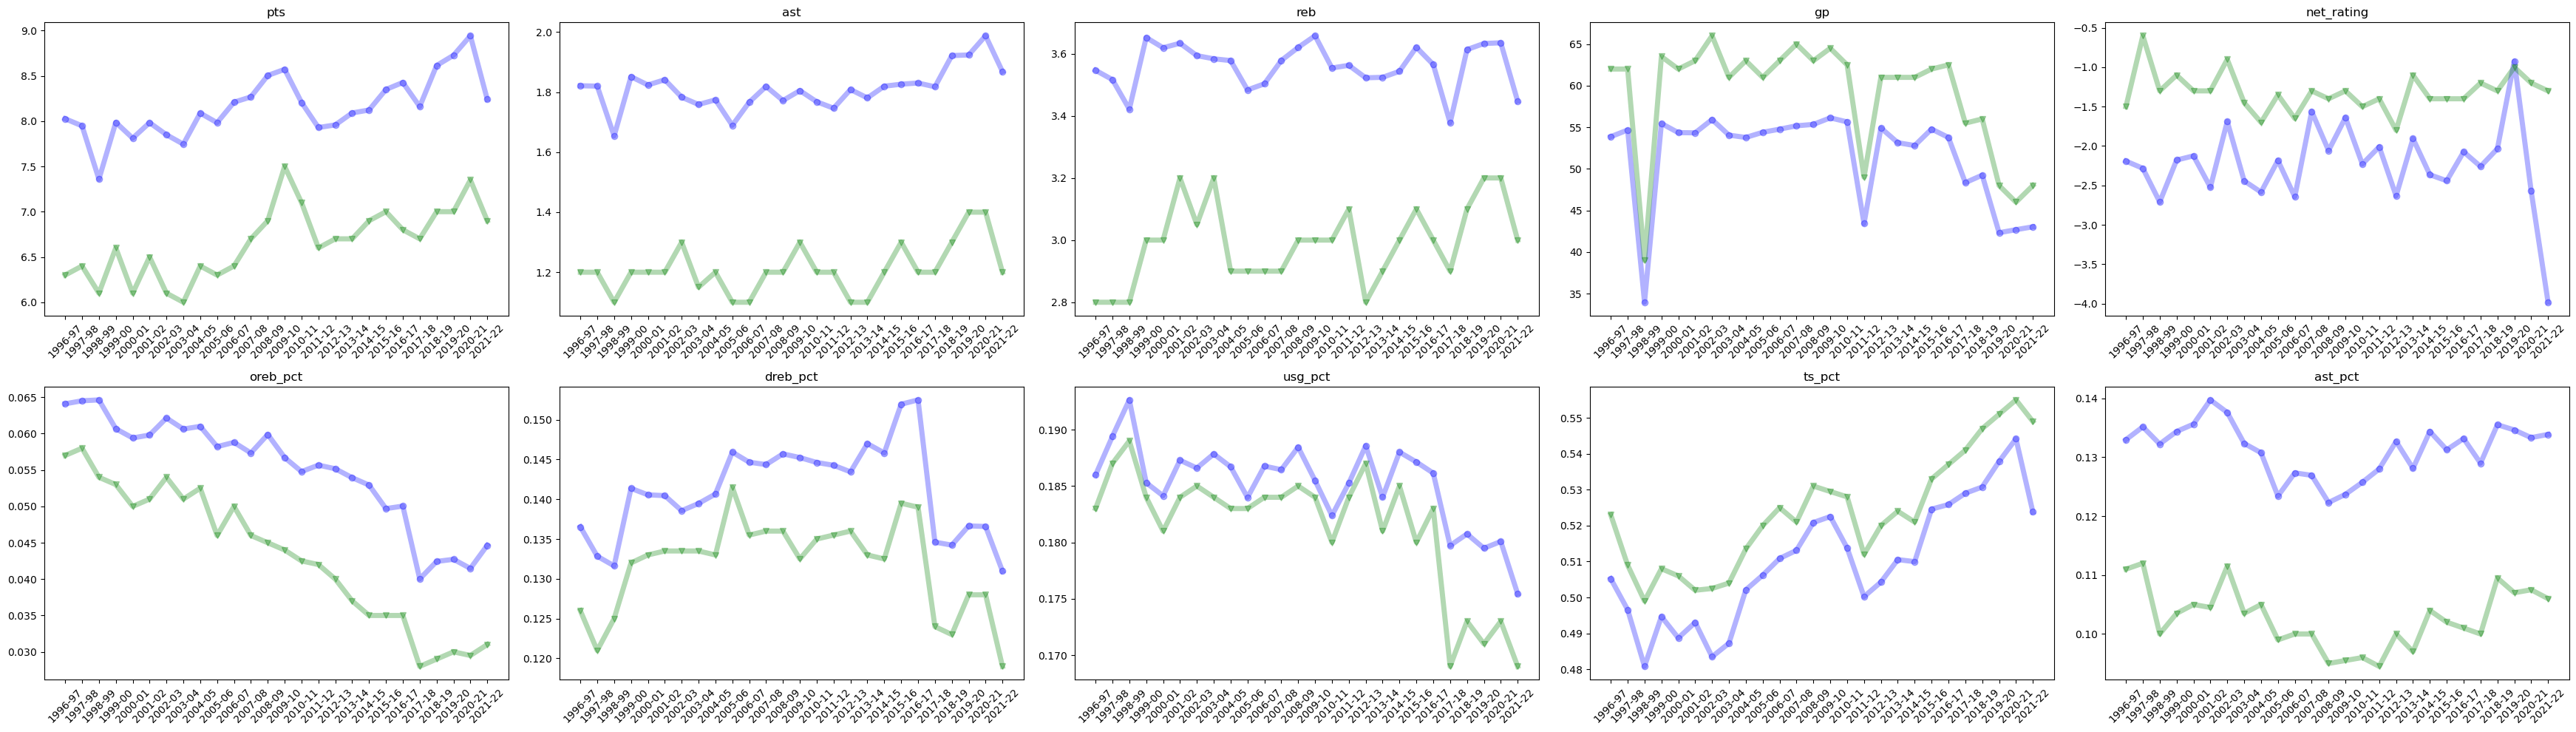

In [27]:
# Plotting how average statistics have changed over the years
fig, axs = plt.subplots(2, 5, figsize = [35, 10]) #figsize is width, height; 2,5 is 2 rows 5 cols for the 2d axs array
k = 0
for i in range(2):
     for j in range(5):
        axs[i][j].plot(avg_league_stats["season"], avg_league_stats[stats[k]], alpha = 0.3, linewidth = 5, 
                       color = "blue", marker = "o")
        axs[i][j].plot(med_league_stats["season"], med_league_stats[stats[k]], alpha = 0.3, linewidth = 5, 
                       color = "green", marker = "v")
        axs[i][j].set_xticklabels(avg_league_stats["season"], rotation = 45)
        axs[i][j].set_title(stats[k])
        axs[i][j].grid(False)
        k += 1

plt.tight_layout()

In [28]:
# Career stats for each player
career_player_stats = nba_dataset.groupby("player_name").mean(["pts", "ast", "reb", "gp", "net_rating", "usg_pct", "ts_pct"]).reset_index()
career_player_stats.drop(columns= ["age", "player_height", "player_weight"], inplace = True)
career_player_stats.head(10)

## Add total number of seasons played
nba_dataset.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma St.,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


### NBA Salaries


In [29]:
for col in salaries:
    print("Column name: " + col)

Column name: team
Column name: salary
Column name: player
Column name: position
Column name: season


In [30]:
# Data dimensions
salaries.shape

(6255, 5)

### Cleaning data

In [31]:
for col in salaries:
    print(col + " NAs : " + str(salaries[col].isna().sum()))

team NAs : 0
salary NAs : 0
player NAs : 0
position NAs : 0
season NAs : 0


In [32]:
len(salaries[salaries.duplicated()])
# No duplicates

0

In [33]:
pd.unique(salaries["team"])
# Some teams are not NBA teams. Lets remove them

array(['Minnesota Timberwolves', 'Portland Trail Blazers',
       'Seattle SuperSonics', 'New York Knicks', 'Boston Celtics',
       'Phoenix Suns', 'San Antonio Spurs', 'Orlando Magic',
       'Indiana Pacers', 'Los Angeles Lakers', 'Toronto Raptors',
       'Dallas Mavericks', 'Sacramento Kings', 'Miami Heat',
       'Milwaukee Bucks', 'Atlanta Hawks', 'Philadelphia 76ers',
       'New Jersey Nets', 'Houston Rockets', 'Utah Jazz',
       'Denver Nuggets', 'Detroit Pistons', 'New Orleans Hornets',
       'Chicago Bulls', 'Memphis Grizzlies', 'Golden State Warriors',
       'LA Clippers', 'Washington Wizards', 'Cleveland Cavaliers',
       'Charlotte Bobcats', 'NO/Oklahoma City\r\r\n Hornets',
       'Brooklyn Nets', 'NO/Oklahoma City Hornets',
       'Oklahoma City Thunder', 'Madrid Real Madrid', 'null Unknown',
       'New Orleans Pelicans', 'Charlotte Hornets', 'Milan Olimpia',
       'Bilbao Basket Bilbao Basket', 'Fenerbahce Ulker Fenerbahce Ulker',
       'Perth Perth', 'Flamengo

In [34]:
nbaTeam_names = ['Minnesota Timberwolves', 'Portland Trail Blazers',
       'Seattle SuperSonics', 'New York Knicks', 'Boston Celtics',
       'Phoenix Suns', 'San Antonio Spurs', 'Orlando Magic',
       'Indiana Pacers', 'Los Angeles Lakers', 'Toronto Raptors',
       'Dallas Mavericks', 'Sacramento Kings', 'Miami Heat',
       'Milwaukee Bucks', 'Atlanta Hawks', 'Philadelphia 76ers',
       'New Jersey Nets', 'Houston Rockets', 'Utah Jazz',
       'Denver Nuggets', 'Detroit Pistons', 'New Orleans Hornets',
       'Chicago Bulls', 'Memphis Grizzlies', 'Golden State Warriors',
       'LA Clippers', 'Washington Wizards', 'Cleveland Cavaliers',
       'Charlotte Bobcats', 'Brooklyn Nets',
       'Oklahoma City Thunder',
       'New Orleans Pelicans', 'Charlotte Hornets']
len(nbaTeam_names)

34

In [35]:
salaries = salaries.loc[salaries["team"].isin(nbaTeam_names)].reset_index(drop = True)
pd.unique(salaries["team"])

array(['Minnesota Timberwolves', 'Portland Trail Blazers',
       'Seattle SuperSonics', 'New York Knicks', 'Boston Celtics',
       'Phoenix Suns', 'San Antonio Spurs', 'Orlando Magic',
       'Indiana Pacers', 'Los Angeles Lakers', 'Toronto Raptors',
       'Dallas Mavericks', 'Sacramento Kings', 'Miami Heat',
       'Milwaukee Bucks', 'Atlanta Hawks', 'Philadelphia 76ers',
       'New Jersey Nets', 'Houston Rockets', 'Utah Jazz',
       'Denver Nuggets', 'Detroit Pistons', 'New Orleans Hornets',
       'Chicago Bulls', 'Memphis Grizzlies', 'Golden State Warriors',
       'LA Clippers', 'Washington Wizards', 'Cleveland Cavaliers',
       'Charlotte Bobcats', 'Brooklyn Nets', 'Oklahoma City Thunder',
       'New Orleans Pelicans', 'Charlotte Hornets'], dtype=object)

### How have salaries changed for players?

In [36]:
# Standardizing salaries to millions
salaries["salary"] = salaries["salary"] / 1000000

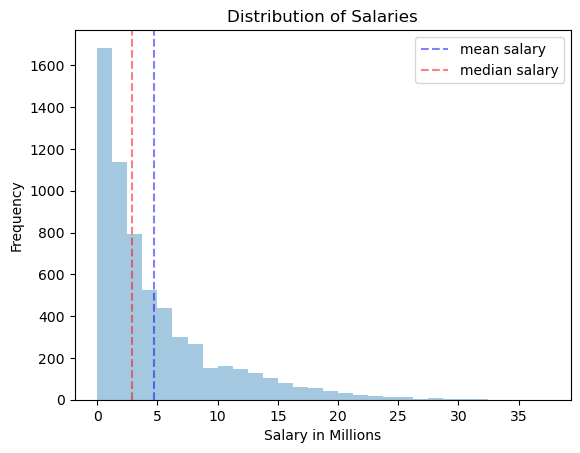

In [37]:
plt.hist(salaries["salary"],
         alpha = 0.4, edgecolor = None, bins = 30)
plt.xlabel("Salary in Millions")
plt.ylabel("Frequency")
plt.title("Distribution of Salaries")
plt.axvline(salaries["salary"].mean(), linestyle = "dashed", color = "blue", alpha = 0.5)
plt.axvline(salaries["salary"].median(), linestyle = "dashed", color = "red", alpha = 0.5)
plt.legend(["mean salary", "median salary"], loc = "upper right")

In [38]:
avg_sal = salaries.groupby("season").mean("salary").reset_index()
med_sal = salaries.groupby("season").median("salary").reset_index()

Text(0.5, 1.0, 'Average NBA Salary Per Season')

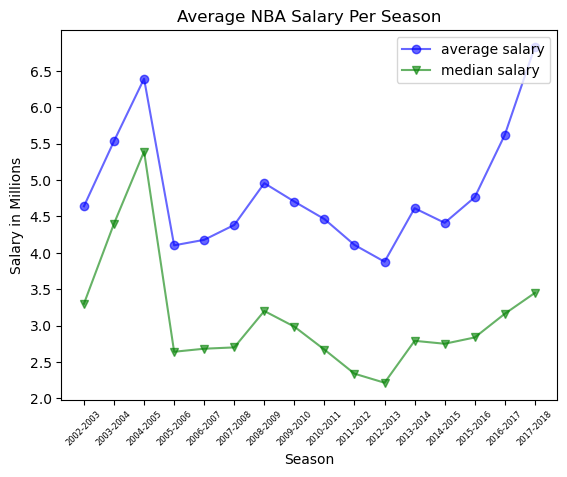

In [39]:
plt.plot(avg_sal["season"], avg_sal["salary"], alpha = 0.6, color = "blue", marker = "o")
plt.plot(med_sal["season"], med_sal["salary"], alpha = 0.6, color = "green", marker = "v")
plt.xticks(size = 6, rotation = 45)
plt.xlabel("Season", size = 10)
plt.ylabel("Salary in Millions", size = 10)
plt.yticks(np.arange(2, 7, 0.5))
plt.grid(False)
plt.legend(["average salary", "median salary"], loc = "upper right")
plt.title("Average NBA Salary Per Season")

In [ ]:
## top 5 highest salaries for each season

### What position gets paid the most?

In [40]:
# Clearing white space
salaries["position"] = salaries["position"].str.strip()
pd.unique(salaries["position"])

array(['PF', 'PG', 'SG', 'C', 'SF', 'G', 'F', 'GF', 'NA'], dtype=object)

In [41]:
# For simplicity, I will classify positions as either G (Shooting or Point Guard), F (Small or Power Forward), and C Center
salaries["position"].replace(["PF", "SF"], "F", regex=True, inplace=True)
salaries["position"].replace(["PG", "SG"], "G", regex=True, inplace=True)
salaries.head()

,team,salary,player,position,season
0,Minnesota Timberwolves,25.200,Kevin Garnett,F,2002-2003
1,Portland Trail Blazers,13.500,Damon Stoudamire,G,2002-2003
2,Seattle SuperSonics,13.080,Gary Payton,G,2002-2003
3,Seattle SuperSonics,12.375,Ray Allen,G,2002-2003
4,New York Knicks,12.375,Latrell Sprewell,G,2002-2003


In [42]:
# Changing the NA into F, as Brandon Wallace played SF/PF during his time with the Celtics
salaries.loc[salaries["player"] == "Brandon Wallace", "position"] = "F"

In [43]:
# Jiri Welsch played both SF and SG in the 2005-2006 season. Lets say he played more as a SG
salaries.loc[salaries["player"] == "Jiri Welsch", "position"] = "G"

###  Salaries for each position

Text(0.5, 1.0, 'Proportion of NBA Players In Each Position')

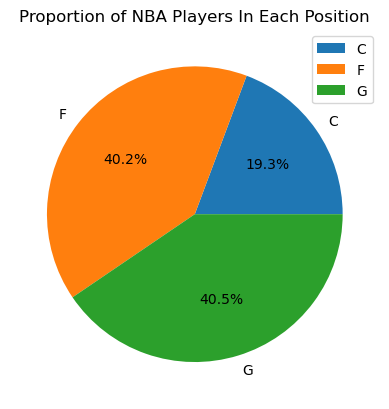

In [44]:
# Pie chart for proportions of players that make up each position 
posCount = salaries.groupby("position")["player"].count().reset_index(name = "count")
plt.pie(posCount["count"], labels = posCount["position"], autopct = '%1.1f%%')
plt.legend(loc = "best")
plt.title("Proportion of NBA Players In Each Position")

array([<Axes: ylabel='2002-2003'>, <Axes: ylabel='2003-2004'>,
       <Axes: ylabel='2004-2005'>, <Axes: ylabel='2005-2006'>,
       <Axes: ylabel='2006-2007'>, <Axes: ylabel='2007-2008'>,
       <Axes: ylabel='2008-2009'>, <Axes: ylabel='2009-2010'>,
       <Axes: ylabel='2010-2011'>, <Axes: ylabel='2011-2012'>,
       <Axes: ylabel='2012-2013'>, <Axes: ylabel='2013-2014'>,
       <Axes: ylabel='2014-2015'>, <Axes: ylabel='2015-2016'>,
       <Axes: ylabel='2016-2017'>, <Axes: ylabel='2017-2018'>],
      dtype=object)

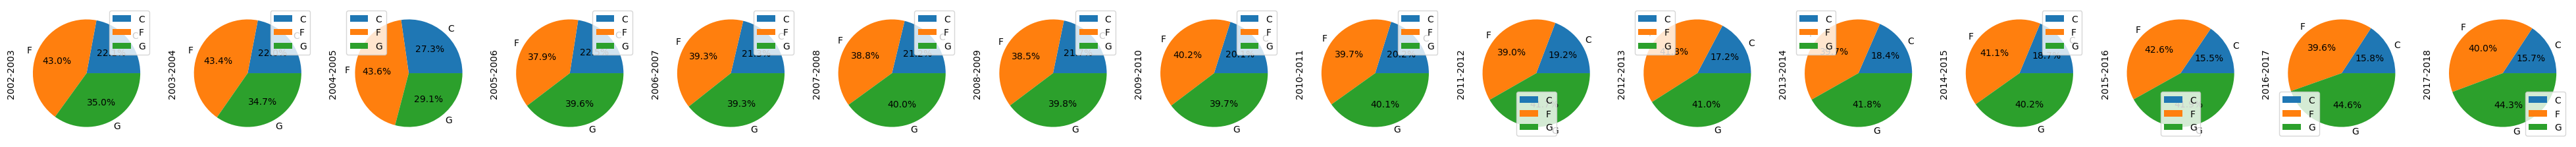

In [45]:
# Proportion of players in each position for each season
posPerSeason = salaries.groupby(["season", "position"])["team"].size().unstack(level = "season")
posPerSeason.plot.pie(subplots = True, figsize = (50,40), legend = True, autopct = '%1.1f%%')

In [46]:
posSeasonSal = salaries.groupby(["position", "season"])["salary"].mean().unstack(level = "position")

Text(0.5, 1.0, 'Average NBA Salary Per Season by Position')

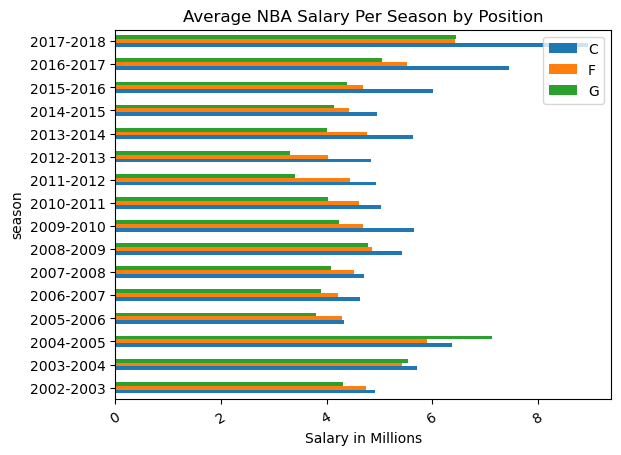

In [47]:
posSeasonSal.plot(kind = "barh")
plt.legend(loc = "upper right")
plt.grid(False)
plt.xticks(size = 10, rotation = 30)
plt.xlabel("Salary in Millions")
plt.title("Average NBA Salary Per Season by Position")

We see that although centers are the least common position, they are often paid the most compared to guards or forwards. It appears teams are valueing big men even more as the years progress, as the average salary of centers grows faster than the salaries of guards or forwards.